In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.utils import get_kfold_data, print_statistics, plot_distribution, convert_non_numeric_to_numeric
from src.constants import *

Load data

In [2]:
data = pd.read_csv(DATA_PATH)

In [3]:
data.head()

,outcome,carat,cut,color,clarity,depth,table,price,x,y,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,-26.701232,1.14,Ideal,G,VS1,62.3,56.0,7948,6.73,6.70,...,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581
1,6.548093,0.38,Premium,H,VS2,60.5,59.0,898,4.69,4.66,...,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653
2,6.612562,0.50,Very Good,E,SI1,60.7,58.0,1351,5.09,5.13,...,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131
3,-5.073562,0.70,Premium,D,SI1,61.2,58.0,2512,5.74,5.70,...,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950
4,-14.436557,0.83,Ideal,G,SI2,62.4,54.0,2751,6.01,6.08,...,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813


In [4]:
data.columns

Index(['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3',
       'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9',
       'b10'],
      dtype='object')

In [5]:
# Find columns
all_columns = data.columns.tolist()
print(all_columns)

numeric_columns = data.select_dtypes(include=["number"]).columns.tolist()
numeric_columns.remove("outcome") # Remove the target column
print(numeric_columns)

non_numeric_columns = data.select_dtypes(exclude=["number"]).columns.tolist()
print(non_numeric_columns)

['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['cut', 'color', 'clarity']


Checking for missing values

In [6]:
for column in all_columns:
    num_nan = data[column].isna().sum()
    num_none = data[column].isnull().sum()
    print(f"{column} | Number of NaN: {num_nan} | Number of None: {num_none}")

outcome | Number of NaN: 0 | Number of None: 0
carat | Number of NaN: 0 | Number of None: 0
cut | Number of NaN: 0 | Number of None: 0
color | Number of NaN: 0 | Number of None: 0
clarity | Number of NaN: 0 | Number of None: 0
depth | Number of NaN: 0 | Number of None: 0
table | Number of NaN: 0 | Number of None: 0
price | Number of NaN: 0 | Number of None: 0
x | Number of NaN: 0 | Number of None: 0
y | Number of NaN: 0 | Number of None: 0
z | Number of NaN: 0 | Number of None: 0
a1 | Number of NaN: 0 | Number of None: 0
a2 | Number of NaN: 0 | Number of None: 0
a3 | Number of NaN: 0 | Number of None: 0
a4 | Number of NaN: 0 | Number of None: 0
a5 | Number of NaN: 0 | Number of None: 0
b1 | Number of NaN: 0 | Number of None: 0
b2 | Number of NaN: 0 | Number of None: 0
b3 | Number of NaN: 0 | Number of None: 0
b4 | Number of NaN: 0 | Number of None: 0
b5 | Number of NaN: 0 | Number of None: 0
a6 | Number of NaN: 0 | Number of None: 0
a7 | Number of NaN: 0 | Number of None: 0
a8 | Number

Data statistics

In [7]:
# for column in numeric_columns:
#     print_statistics(data[column], column)

In [8]:
# Find columns
all_columns = data.columns.tolist()
print(all_columns)

numeric_columns = data.select_dtypes(include=["number"]).columns.tolist()
numeric_columns.remove("outcome") # Remove the target column
print(numeric_columns)

non_numeric_columns = data.select_dtypes(exclude=["number"]).columns.tolist()
print(non_numeric_columns)

['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['cut', 'color', 'clarity']


Plotting correlation matrix

In [9]:
data = convert_non_numeric_to_numeric(data=data)
print(data)

['G', 'E', 'F', 'H', 'D', 'I', 'J']
        outcome  carat  cut  clarity  depth  table  price     x     y     z  \
0    -26.701232   1.14    0        3   62.3   56.0   7948  6.73  6.70  4.18   
1      6.548093   0.38    1        4   60.5   59.0    898  4.69  4.66  2.83   
2      6.612562   0.50    2        5   60.7   58.0   1351  5.09  5.13  3.10   
3     -5.073562   0.70    1        5   61.2   58.0   2512  5.74  5.70  3.50   
4    -14.436557   0.83    0        6   62.4   54.0   2751  6.01  6.08  3.77   
...         ...    ...  ...      ...    ...    ...    ...   ...   ...   ...   
9995  10.718277   0.33    0        3   62.6   57.0   1002  4.42  4.40  2.76   
9996 -12.246698   1.01    4        5   69.5   55.0   4853  6.00  5.94  4.15   
9997  11.122516   0.52    2        6   57.9   61.0   1273  5.28  5.33  3.07   
9998 -24.730782   0.31    0        0   62.0   54.0    801  4.35  4.39  2.71   
9999   8.735755   0.37    2        5   59.9   59.0    649  4.68  4.70  2.81   

      ...      

In [10]:
def plot_correlation_matrix(data:pd.DataFrame):
    corr = data.corr()
    plt.figure(figsize=(40, 40))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, center=0)
    plt.title("Correlation Matrix")
    plt.show()

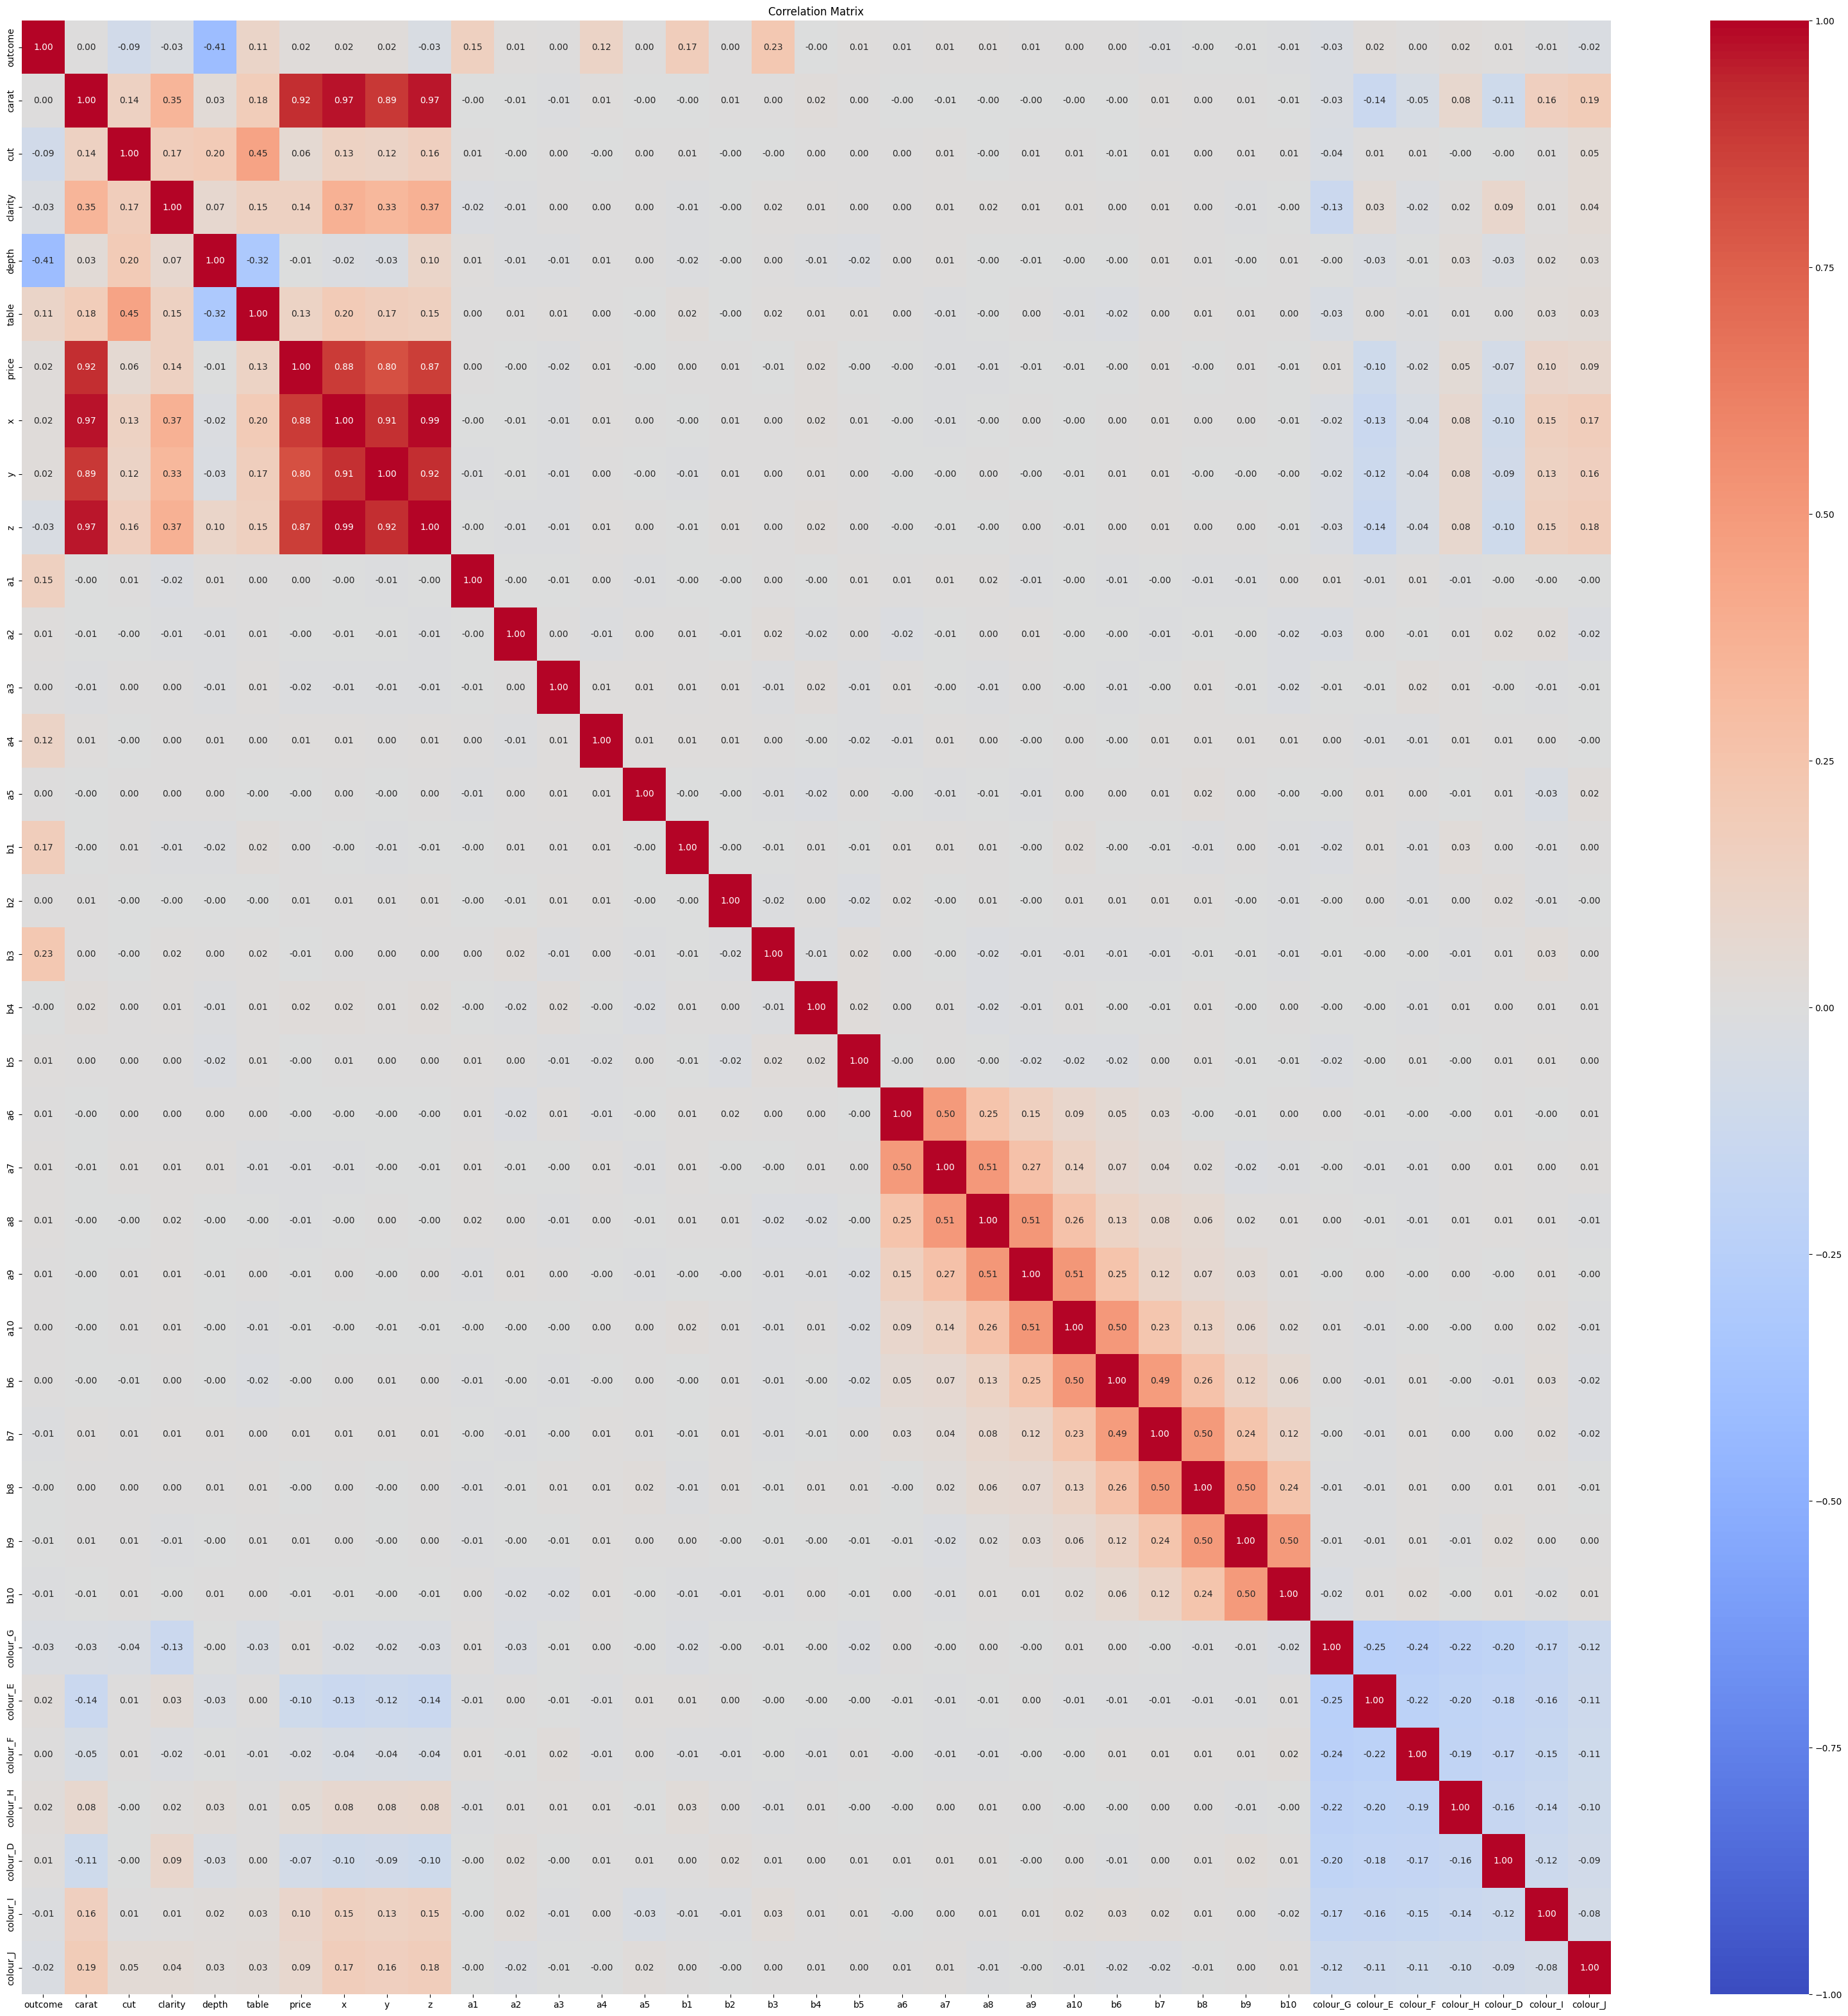

In [11]:
plot_correlation_matrix(data)

Data visualisation

In [12]:
# for column in numeric_columns:
#     plot_distribution(data[column], column, f"Distribution of {column}")

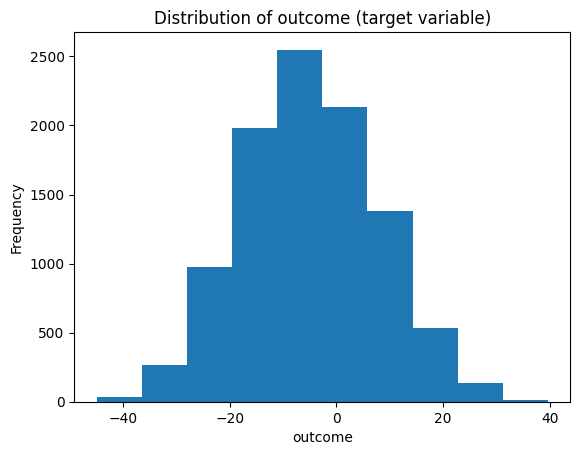

In [13]:
plot_distribution(data["outcome"], "outcome", "Distribution of outcome (target variable)")

Data splitting (K-Fold Cross Validation)

In [14]:
kfold_data = get_kfold_data(data=data, k=NUM_FOLDS, reproducibility_seed=REPRODUCIBILITY_SEED)

Fold: 0/5
Train shape: (6400, 37) | 64.00%
Validation shape: (1600, 37) | 16.00%
Test shape: (2000, 37) | 20.00%

Fold: 1/5
Train shape: (6400, 37) | 64.00%
Validation shape: (1600, 37) | 16.00%
Test shape: (2000, 37) | 20.00%

Fold: 2/5
Train shape: (6400, 37) | 64.00%
Validation shape: (1600, 37) | 16.00%
Test shape: (2000, 37) | 20.00%

Fold: 3/5
Train shape: (6400, 37) | 64.00%
Validation shape: (1600, 37) | 16.00%
Test shape: (2000, 37) | 20.00%

Fold: 4/5
Train shape: (6400, 37) | 64.00%
Validation shape: (1600, 37) | 16.00%
Test shape: (2000, 37) | 20.00%



Data normalisation (using mean, std standardisation)

Before standardization:


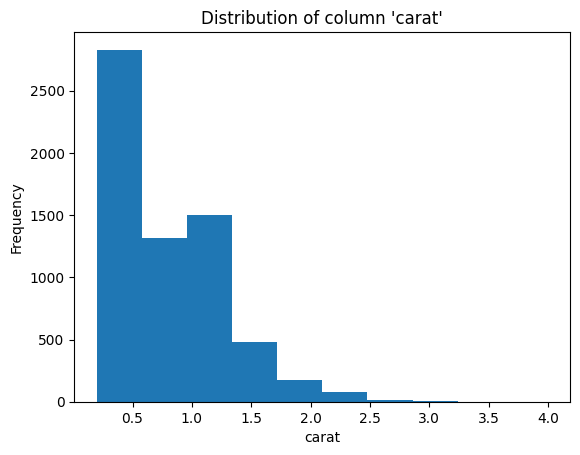

Statistics for column: carat
Mean: 0.7902968749999999
Median: 0.7
Standard Deviation: 0.4651526972016175
Minimum Value: 0.2
Maximum Value: 4.0

After standardization:


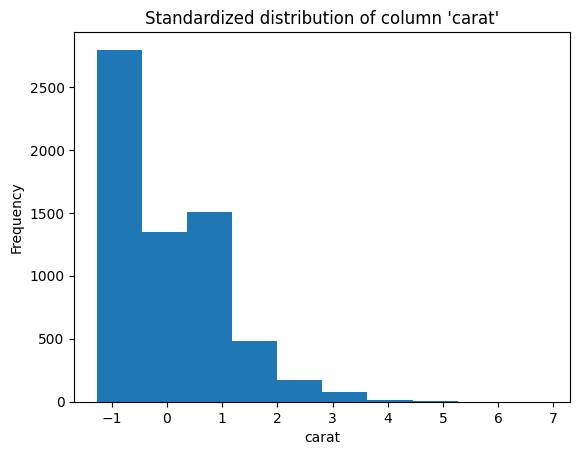

Statistics for column: carat
Mean: 2.242650509742816e-16
Median: -0.19412307743672086
Standard Deviation: 0.9999999785016838
Minimum Value: -1.2690388895106215
Maximum Value: 6.9003212822510225

Before standardization:


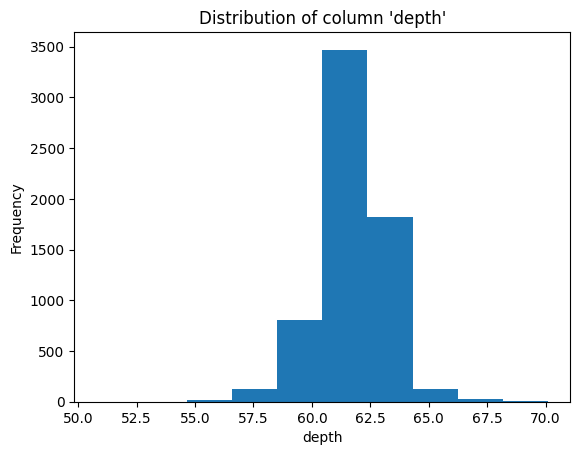

Statistics for column: depth
Mean: 61.747671874999995
Median: 61.9
Standard Deviation: 1.4344948526408474
Minimum Value: 50.8
Maximum Value: 70.1

After standardization:


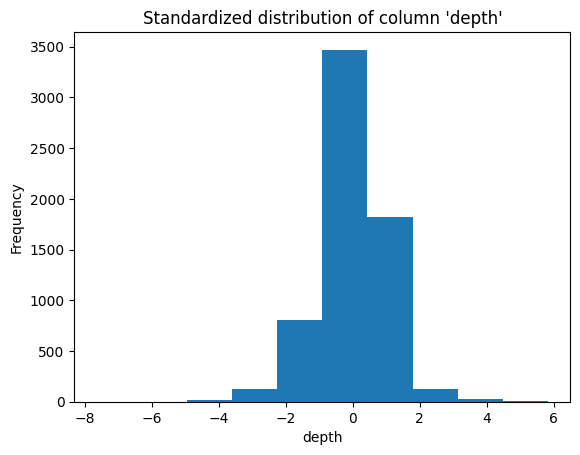

Statistics for column: depth
Mean: 3.657074643115265e-15
Median: 0.10618938343186114
Standard Deviation: 0.999999993028905
Minimum Value: -7.631726094052212
Maximum Value: 5.822487303735406

Before standardization:


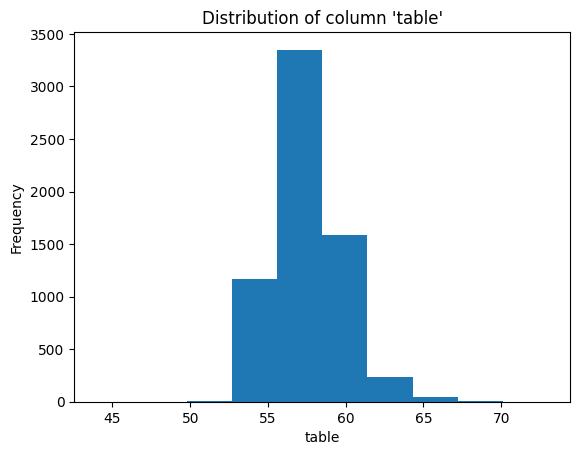

Statistics for column: table
Mean: 57.4729375
Median: 57.0
Standard Deviation: 2.2381906152148754
Minimum Value: 44.0
Maximum Value: 73.0

After standardization:


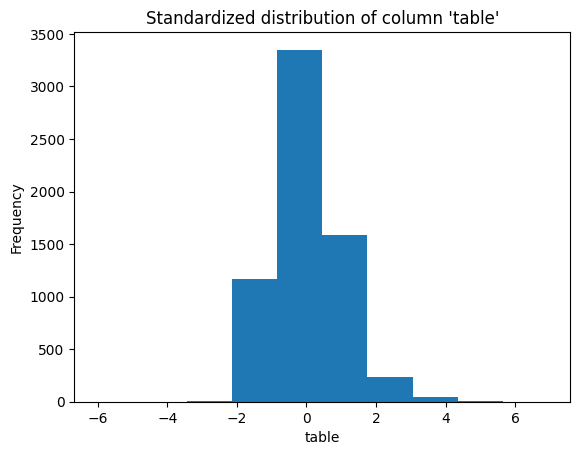

Statistics for column: table
Mean: -2.020605904817785e-16
Median: -0.2113034942922239
Standard Deviation: 0.9999999955321053
Minimum Value: -6.019566585713201
Maximum Value: 6.937328002841285

Before standardization:


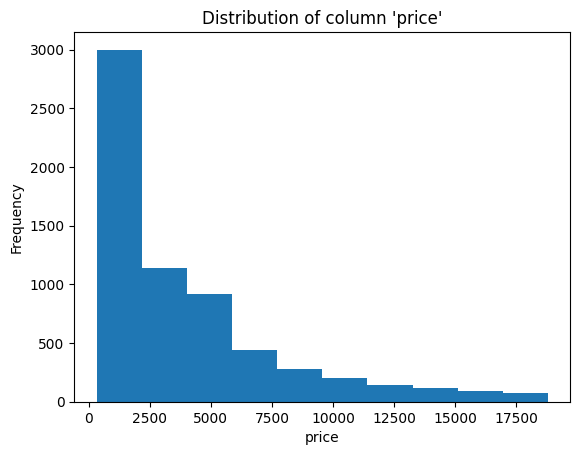

Statistics for column: price
Mean: 3850.6078125
Median: 2421.5
Standard Deviation: 3863.3901327260296
Minimum Value: 336
Maximum Value: 18791

After standardization:


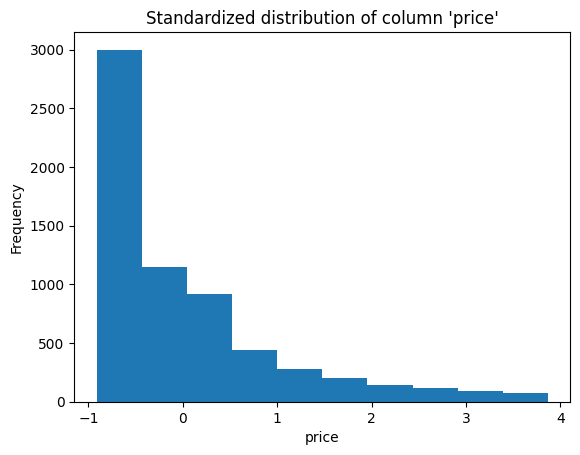

Statistics for column: price
Mean: 9.992007221626408e-18
Median: -0.36991030245447004
Standard Deviation: 0.9999999999974115
Minimum Value: -0.9097211753789348
Maximum Value: 3.8671714929600713

Before standardization:


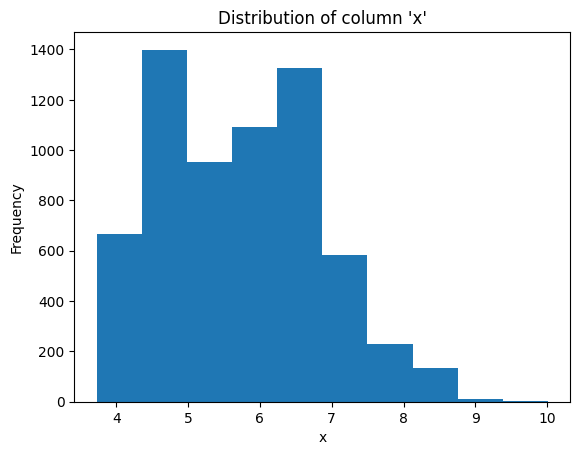

Statistics for column: x
Mean: 5.717576562500001
Median: 5.69
Standard Deviation: 1.1044981205126743
Minimum Value: 3.73
Maximum Value: 10.01

After standardization:


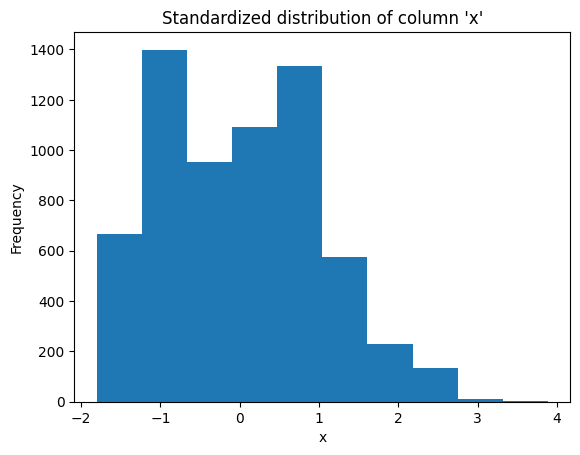

Statistics for column: x
Mean: -5.229150445984487e-16
Median: -0.024967504913023242
Standard Deviation: 0.9999999909461142
Minimum Value: -1.7995291323647857
Maximum Value: 3.8863111841643296

Before standardization:


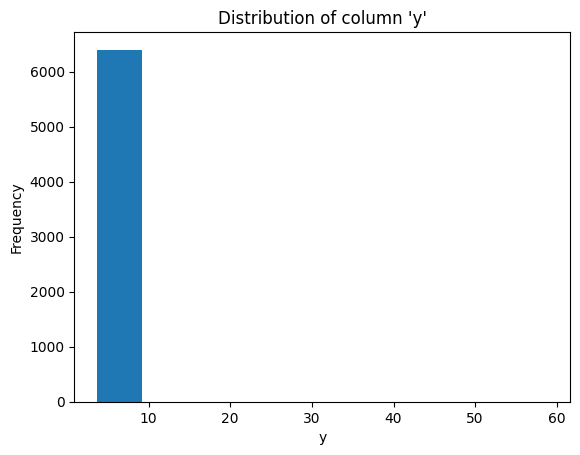

Statistics for column: y
Mean: 5.7286375
Median: 5.71
Standard Deviation: 1.2821976708630947
Minimum Value: 3.68
Maximum Value: 58.9

After standardization:


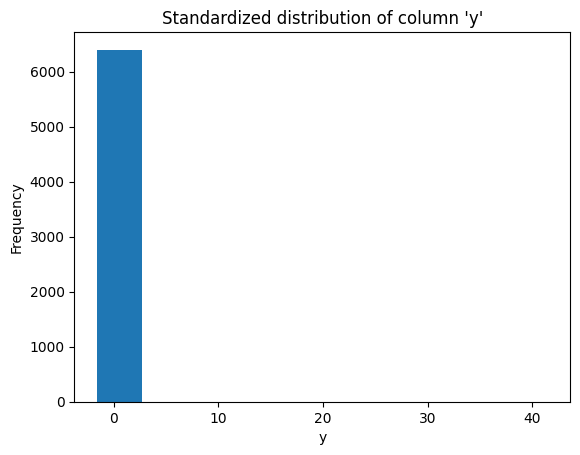

Statistics for column: y
Mean: 3.1002977962657496e-16
Median: -0.014535590165358941
Standard Deviation: 0.9999999922008908
Minimum Value: -1.5977548006645792
Maximum Value: 41.46892736867875

Before standardization:


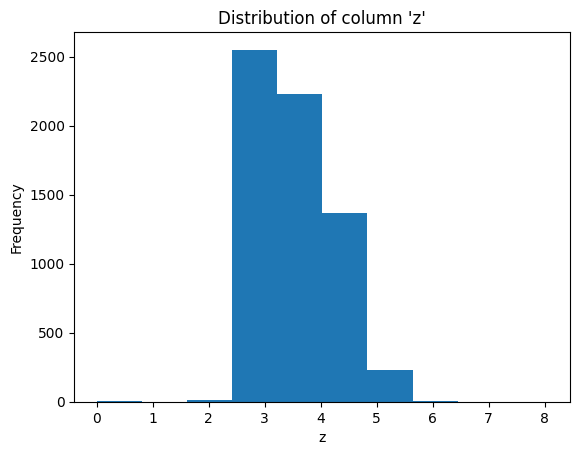

Statistics for column: z
Mean: 3.530546875
Median: 3.53
Standard Deviation: 0.6879546641537133
Minimum Value: 0.0
Maximum Value: 8.06

After standardization:


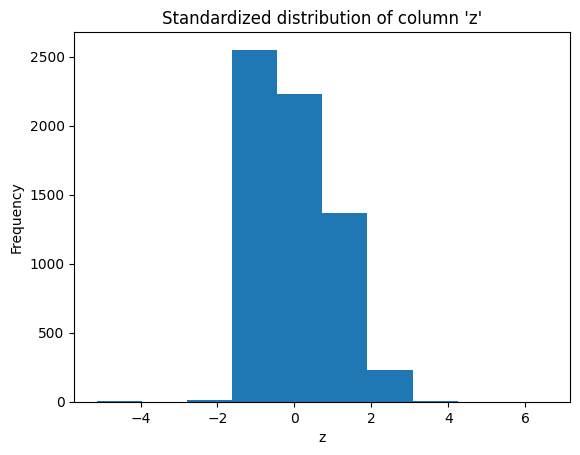

Statistics for column: z
Mean: -2.742250870824137e-16
Median: -0.0007949288238692882
Standard Deviation: 0.9999999854641587
Minimum Value: -5.131946925635905
Maximum Value: 6.583941203062398

Before standardization:


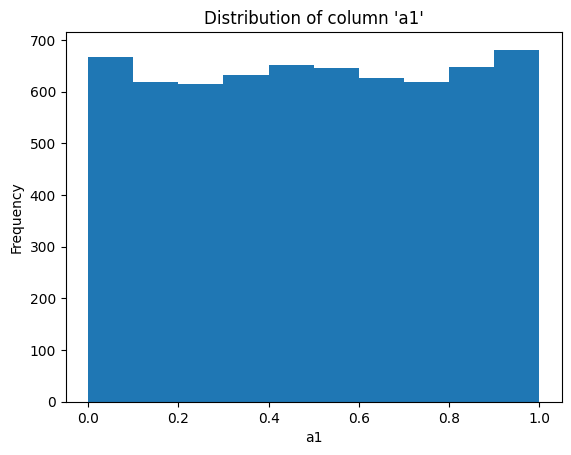

Statistics for column: a1
Mean: 0.5025143770686918
Median: 0.5014849662547936
Standard Deviation: 0.29048086188908856
Minimum Value: 0.0002268843818455
Maximum Value: 0.999462528852746

After standardization:


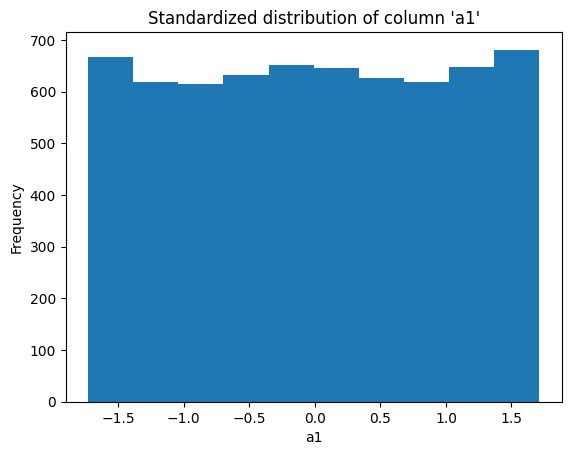

Statistics for column: a1
Mean: 4.884981308350689e-17
Median: -0.0035438161804037674
Standard Deviation: 0.9999999655743254
Minimum Value: -1.7291585825266658
Maximum Value: 1.7107775412275648

Before standardization:


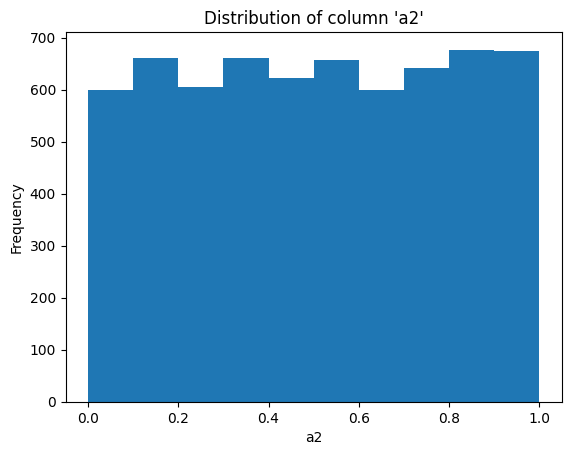

Statistics for column: a2
Mean: 0.5064478036192304
Median: 0.5073042295407506
Standard Deviation: 0.28933871382735304
Minimum Value: 0.0001548470463603
Maximum Value: 0.999976135091856

After standardization:


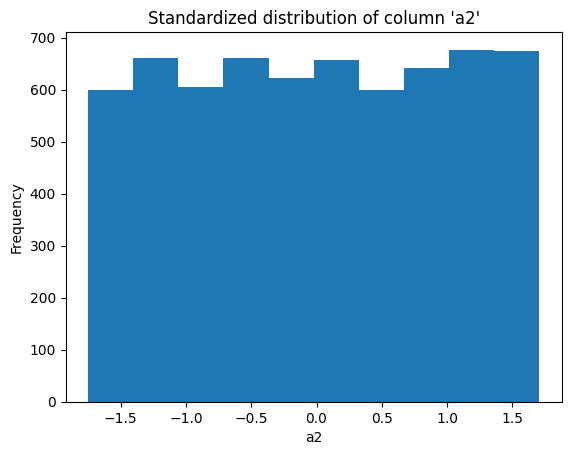

Statistics for column: a2
Mean: 2.2148949341271874e-16
Median: 0.0029599422786948234
Standard Deviation: 0.999999965438432
Minimum Value: -1.7498278483974117
Maximum Value: 1.7057113024633077

Before standardization:


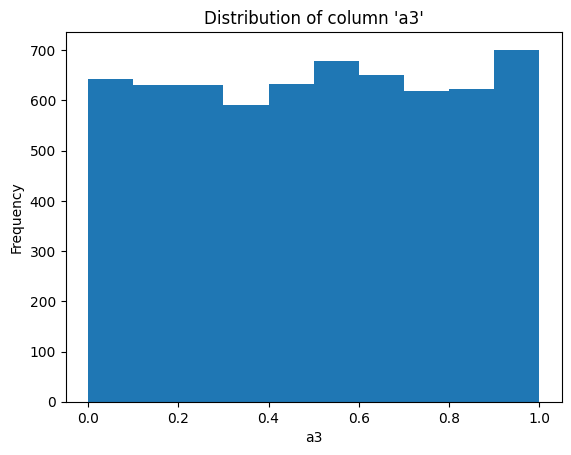

Statistics for column: a3
Mean: 0.5054488247827612
Median: 0.5099297381239015
Standard Deviation: 0.2901081099145467
Minimum Value: 0.0001761061139404
Maximum Value: 0.999960078159347

After standardization:


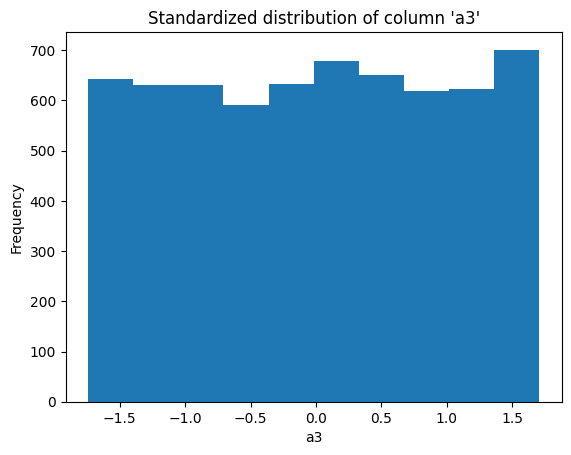

Statistics for column: a3
Mean: 1.609823385706477e-16
Median: 0.015445666748177184
Standard Deviation: 0.9999999655300926
Minimum Value: -1.741670377298134
Maximum Value: 1.7045757061961841

Before standardization:


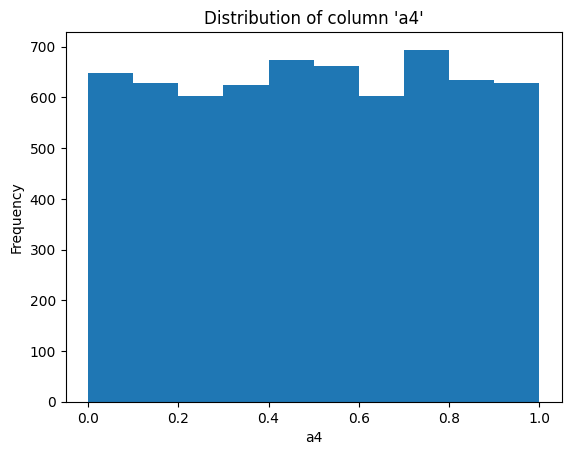

Statistics for column: a4
Mean: 0.5018155433836
Median: 0.5032611171482131
Standard Deviation: 0.2882508451642808
Minimum Value: 0.0001009085681289
Maximum Value: 0.999872367363423

After standardization:


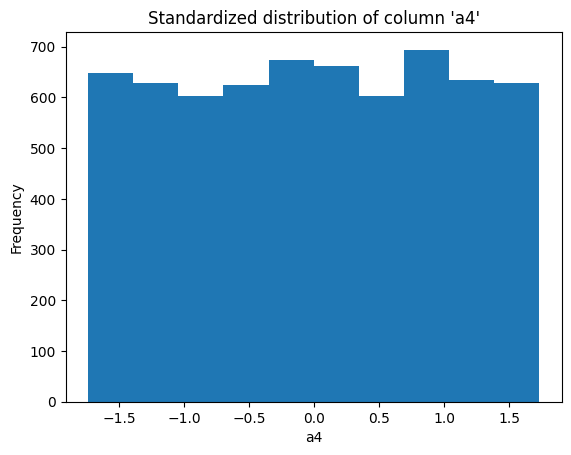

Statistics for column: a4
Mean: 9.769962616701378e-17
Median: 0.005014985172512851
Standard Deviation: 0.9999999653079954
Minimum Value: -1.7405486430544408
Maximum Value: 1.727858964012332

Before standardization:


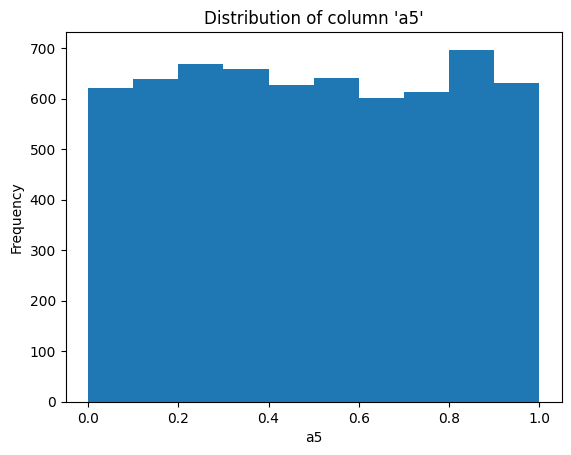

Statistics for column: a5
Mean: 0.5003260208820212
Median: 0.49740970705170195
Standard Deviation: 0.28903079304344814
Minimum Value: 0.0001657167449593
Maximum Value: 0.999946979805827

After standardization:


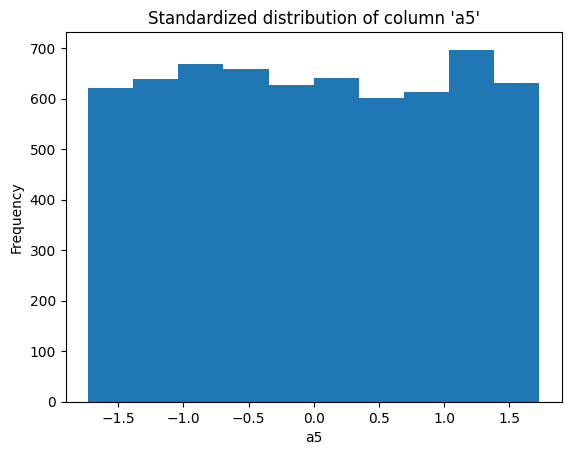

Statistics for column: a5
Mean: -5.551115123125783e-17
Median: -0.010089975876656951
Standard Deviation: 0.9999999654016116
Minimum Value: -1.7304740493762387
Maximum Value: 1.7286080018561243

Before standardization:


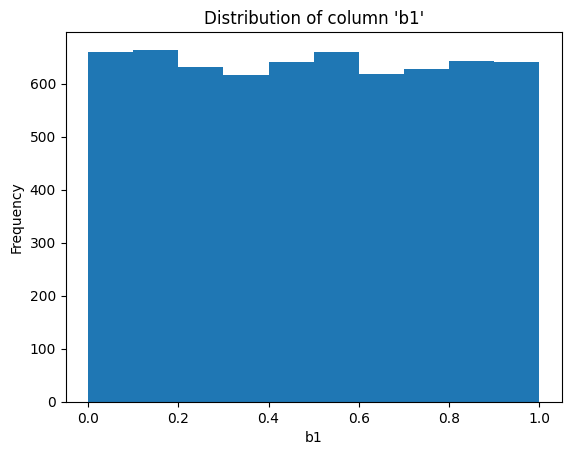

Statistics for column: b1
Mean: 0.4973169627781317
Median: 0.4970654760254545
Standard Deviation: 0.2895831172176593
Minimum Value: 0.0002307298127561
Maximum Value: 0.999704224057496

After standardization:


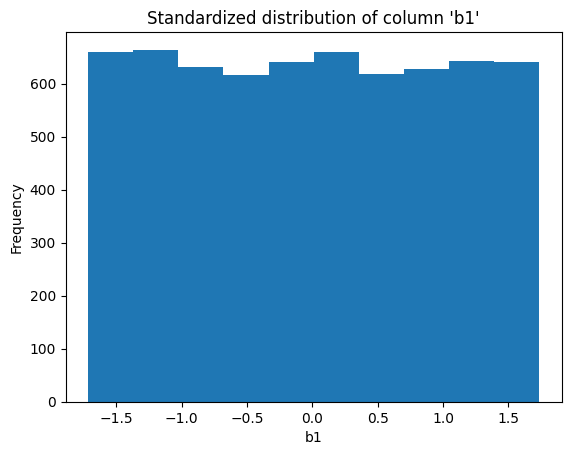

Statistics for column: b1
Mean: 1.2545520178264268e-16
Median: -0.0008684440806116741
Standard Deviation: 0.9999999654676013
Minimum Value: -1.7165579974960032
Maximum Value: 1.734863719811117

Before standardization:


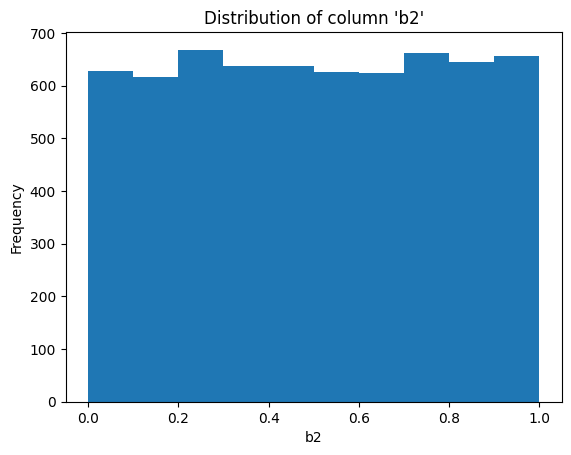

Statistics for column: b2
Mean: 0.502793638512885
Median: 0.501630963291973
Standard Deviation: 0.2889769073358514
Minimum Value: 4.75924462080002e-05
Maximum Value: 0.999783204635605

After standardization:


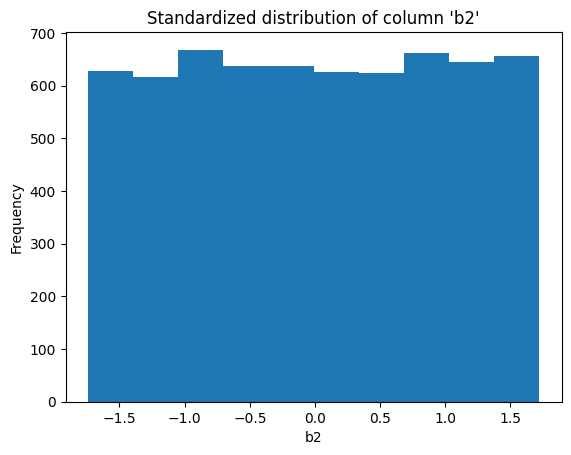

Statistics for column: b2
Mean: 1.9539925233402755e-16
Median: -0.0040234190039504
Standard Deviation: 0.99999996539516
Minimum Value: -1.7397446505472316
Maximum Value: 1.719824443781143

Before standardization:


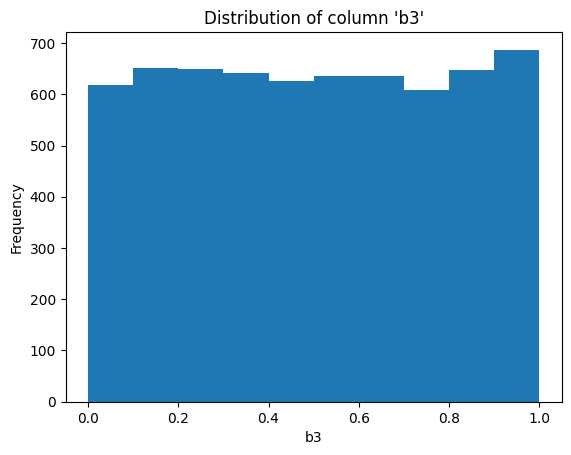

Statistics for column: b3
Mean: 0.502831500000284
Median: 0.5027343758847564
Standard Deviation: 0.2903080961247147
Minimum Value: 0.0001280894502997
Maximum Value: 0.999840626725927

After standardization:


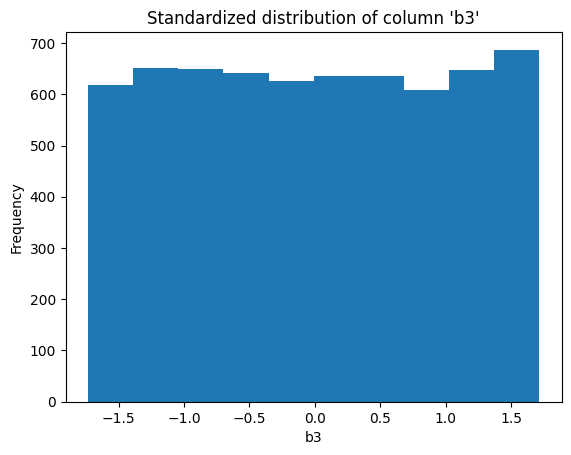

Statistics for column: b3
Mean: 1.376676550535194e-16
Median: -0.0003345552999672579
Standard Deviation: 0.9999999655538383
Minimum Value: -1.7316203025141357
Maximum Value: 1.712005680310321

Before standardization:


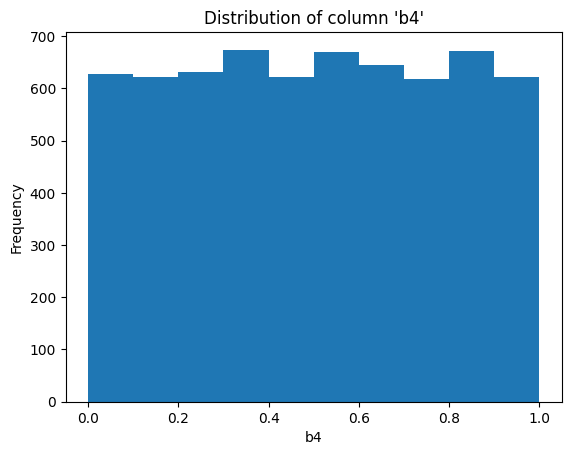

Statistics for column: b4
Mean: 0.5009860381166437
Median: 0.5042821537936104
Standard Deviation: 0.2869392200231065
Minimum Value: 3.2366719096899e-05
Maximum Value: 0.999843736179173

After standardization:


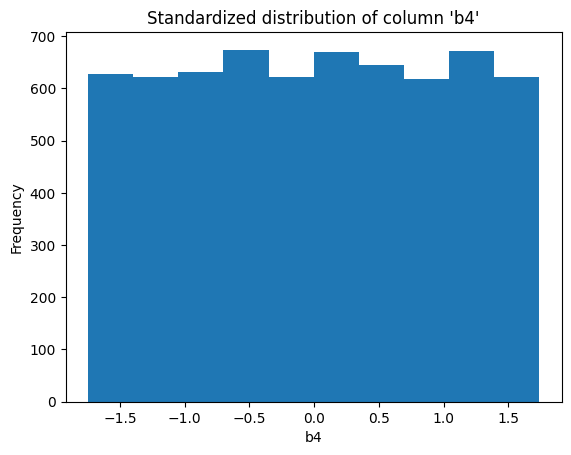

Statistics for column: b4
Mean: -6.661338147750939e-17
Median: 0.011487155927411445
Standard Deviation: 0.999999965149415
Minimum Value: -1.7458528461138136
Maximum Value: 1.7385482564456507

Before standardization:


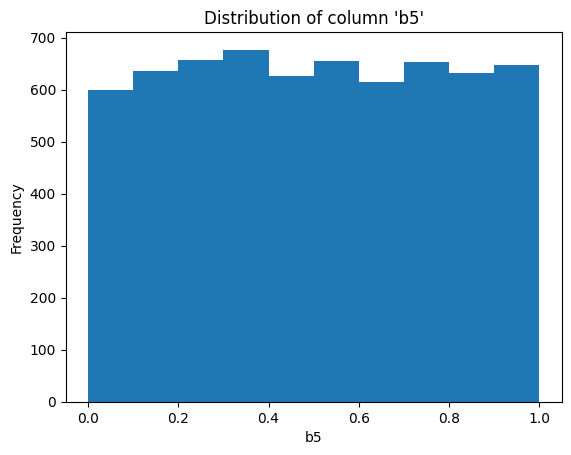

Statistics for column: b5
Mean: 0.5016699818488268
Median: 0.5003648495767266
Standard Deviation: 0.28710142710812353
Minimum Value: 0.0001021134667098
Maximum Value: 0.999867933103815

After standardization:


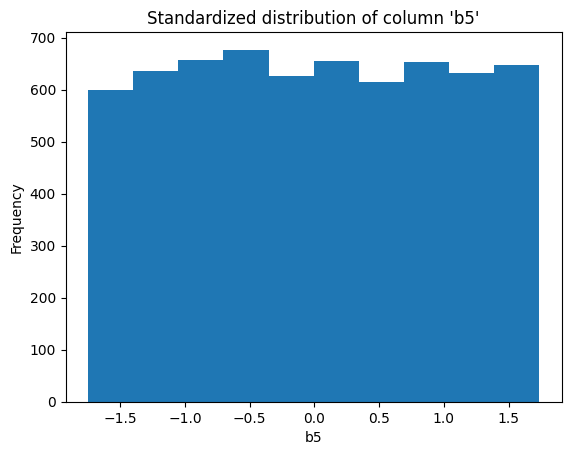

Statistics for column: b5
Mean: 2.2759572004815707e-16
Median: -0.004545892508398734
Standard Deviation: 0.9999999651691049
Minimum Value: -1.7470057741063294
Maximum Value: 1.7352680511570024

Before standardization:


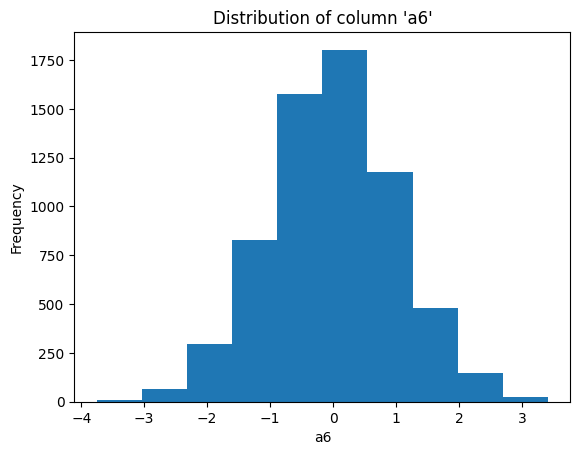

Statistics for column: a6
Mean: -0.00608459154980624
Median: -0.00959483461232485
Standard Deviation: 1.0014387499365716
Minimum Value: -3.75068753032843
Maximum Value: 3.41019319258906

After standardization:


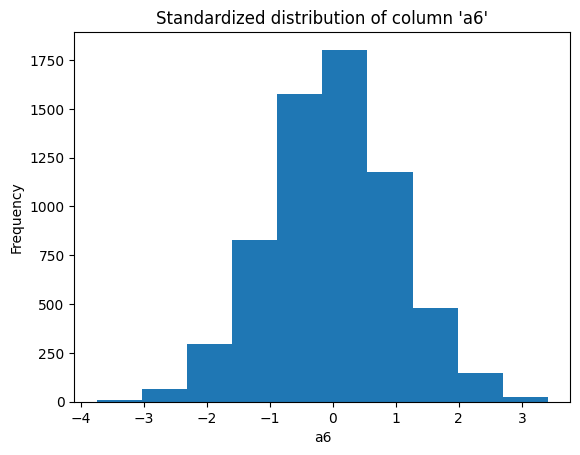

Statistics for column: a6
Mean: -1.1102230246251566e-18
Median: -0.003505199921302168
Standard Deviation: 0.999999990014367
Minimum Value: -3.739223094396503
Maximum Value: 3.4113696421688773

Before standardization:


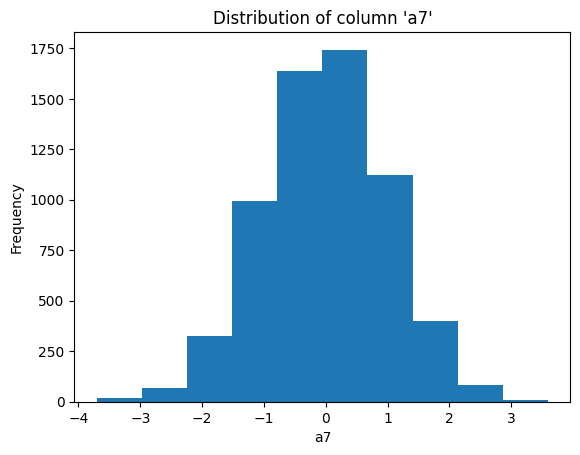

Statistics for column: a7
Mean: -1.5460562948319546e-05
Median: 0.0111330182933802
Standard Deviation: 1.0015283065853993
Minimum Value: -3.70125162705897
Maximum Value: 3.59320909691285

After standardization:


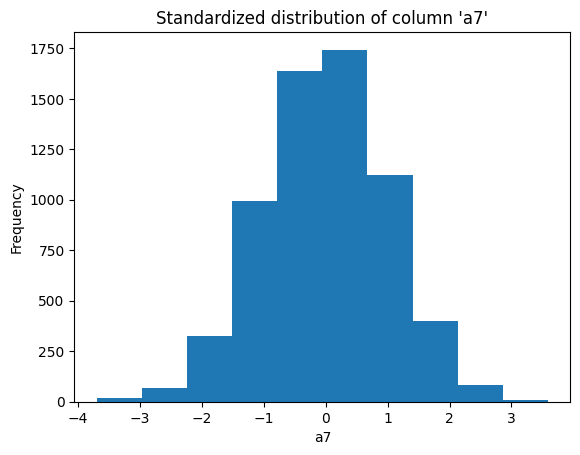

Statistics for column: a7
Mean: -3.885780586188048e-18
Median: 0.01113146645153083
Standard Deviation: 0.99999999001526
Minimum Value: -3.695588137852138
Maximum Value: 3.5877413528620963

Before standardization:


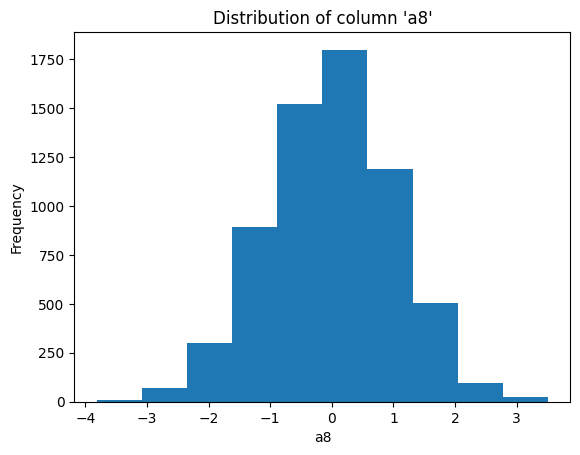

Statistics for column: a8
Mean: -0.009991242917324917
Median: 0.009151036389305499
Standard Deviation: 1.0211046294139872
Minimum Value: -3.81071336032503
Maximum Value: 3.50486250547079

After standardization:


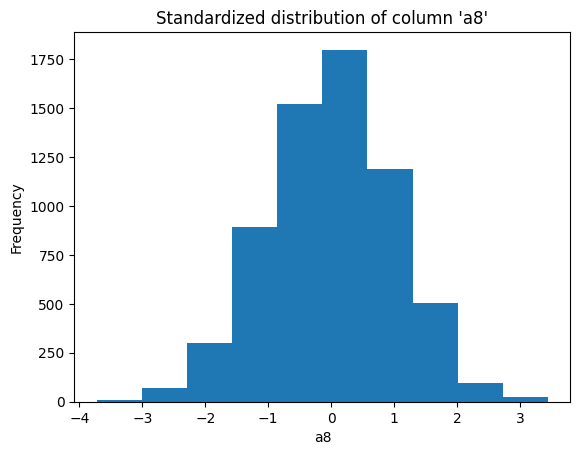

Statistics for column: a8
Mean: 6.661338147750939e-18
Median: 0.018746638265806127
Standard Deviation: 0.9999999902066845
Minimum Value: -3.7221671224498043
Maximum Value: 3.442207206506566

Before standardization:


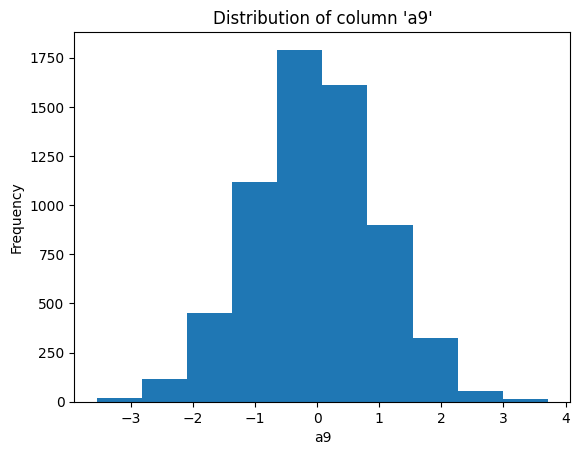

Statistics for column: a9
Mean: -0.02497485244634234
Median: -0.025769254631874003
Standard Deviation: 1.009686889794971
Minimum Value: -3.54932429336258
Maximum Value: 3.71498492360716

After standardization:


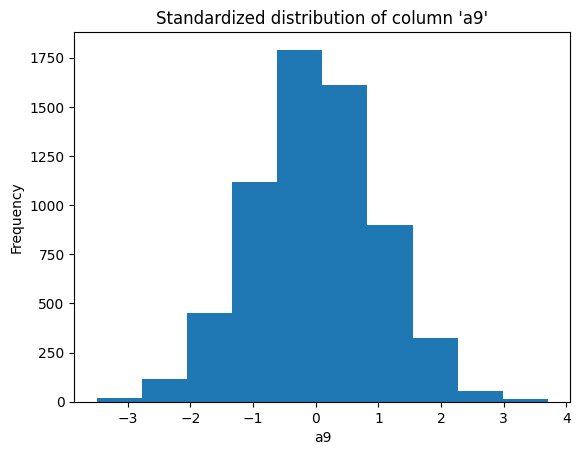

Statistics for column: a9
Mean: -3.164135620181696e-17
Median: -0.0007867807195408535
Standard Deviation: 0.9999999900959398
Minimum Value: -3.4905369591621915
Maximum Value: 3.704078736500341

Before standardization:


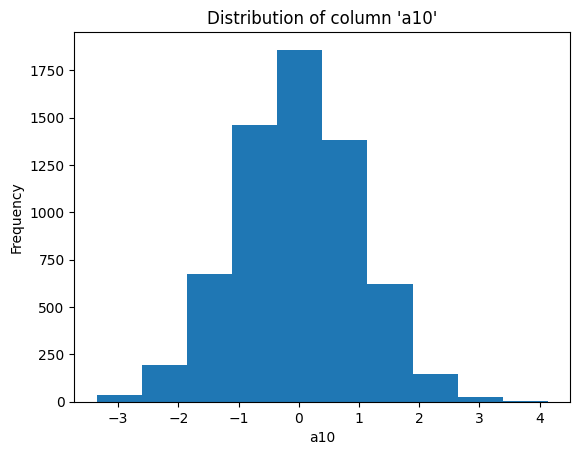

Statistics for column: a10
Mean: -0.025462974031954126
Median: -0.0415978053135376
Standard Deviation: 1.0041941276124082
Minimum Value: -3.35209714692509
Maximum Value: 4.13568465264953

After standardization:


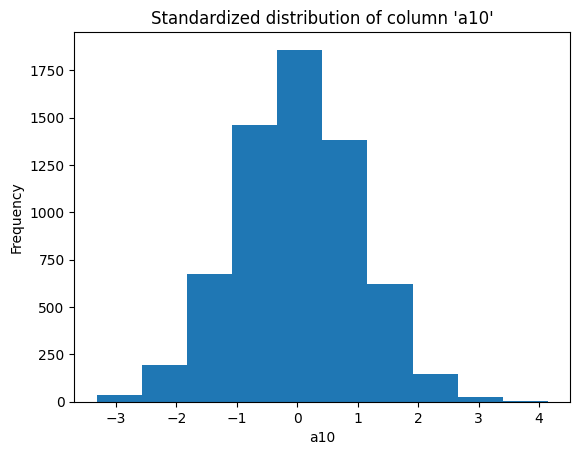

Statistics for column: a10
Mean: -2.2204460492503132e-17
Median: -0.016067442217842426
Standard Deviation: 0.9999999900417664
Minimum Value: -3.3127400851020767
Maximum Value: 4.143768093065263

Before standardization:


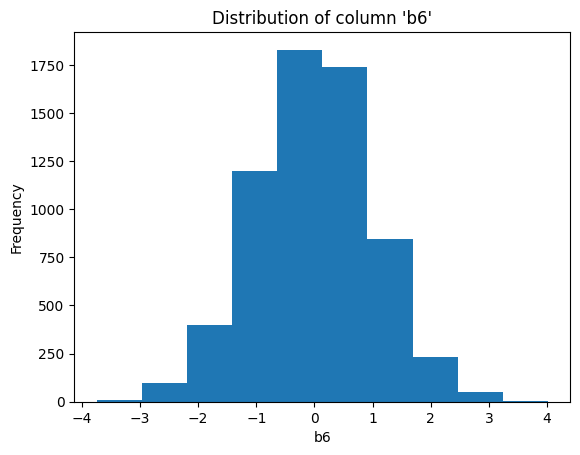

Statistics for column: b6
Mean: -0.004424905891378532
Median: 0.0077332079962789
Standard Deviation: 0.9997951046050269
Minimum Value: -3.74025441070399
Maximum Value: 4.01251273597352

After standardization:


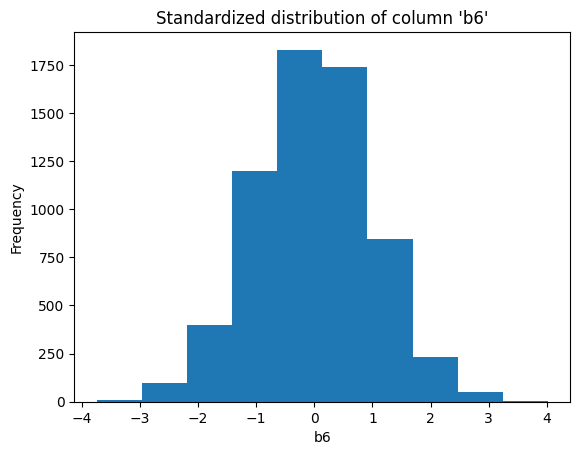

Statistics for column: b6
Mean: 4.440892098500626e-18
Median: 0.012160605418101633
Standard Deviation: 0.9999999899979507
Minimum Value: -3.7365950785711393
Maximum Value: 4.017760822377899

Before standardization:


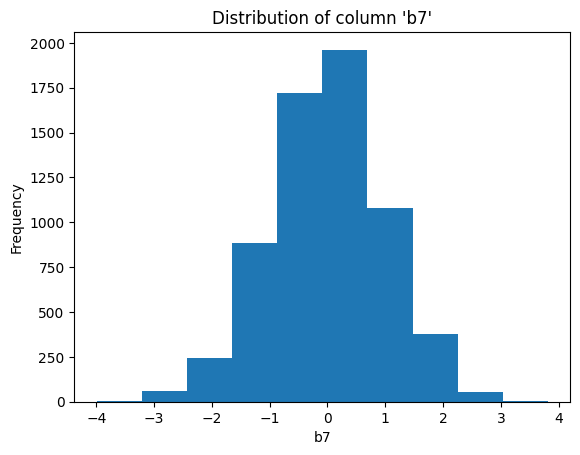

Statistics for column: b7
Mean: 0.0028064347527983168
Median: 0.03372074711573465
Standard Deviation: 0.9944799341164833
Minimum Value: -3.98784457289897
Maximum Value: 3.81265243377099

After standardization:


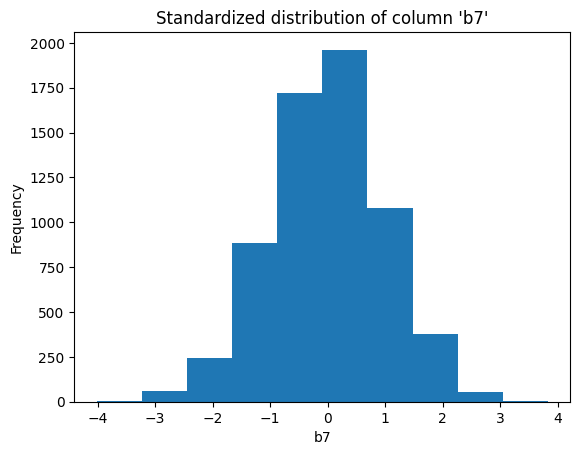

Statistics for column: b7
Mean: 1.9984014443252817e-17
Median: 0.031085908314019597
Standard Deviation: 0.9999999899444931
Minimum Value: -4.012801898380309
Maximum Value: 3.830993296102053

Before standardization:


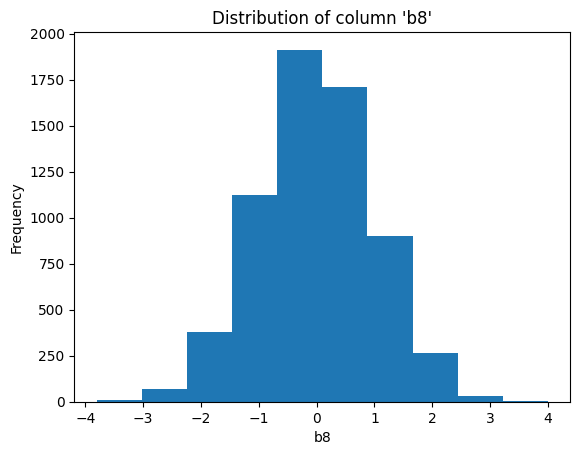

Statistics for column: b8
Mean: -0.006939603292126562
Median: -0.0082996475399595
Standard Deviation: 0.9905479942633719
Minimum Value: -3.79742549692231
Maximum Value: 3.99653130671913

After standardization:


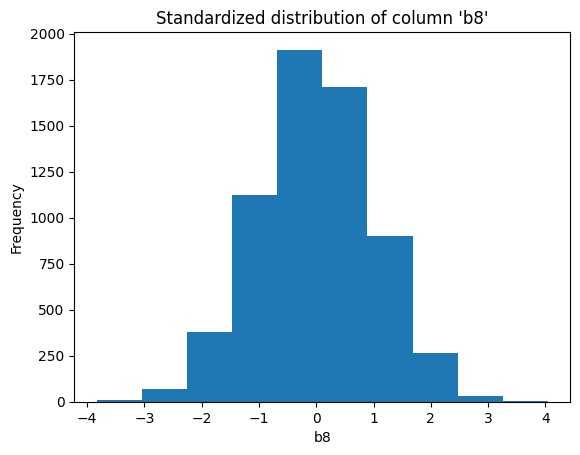

Statistics for column: b8
Mean: -9.436895709313831e-18
Median: -0.0013730220463614422
Standard Deviation: 0.9999999899045782
Minimum Value: -3.826655424387034
Maximum Value: 4.041672783933845

Before standardization:


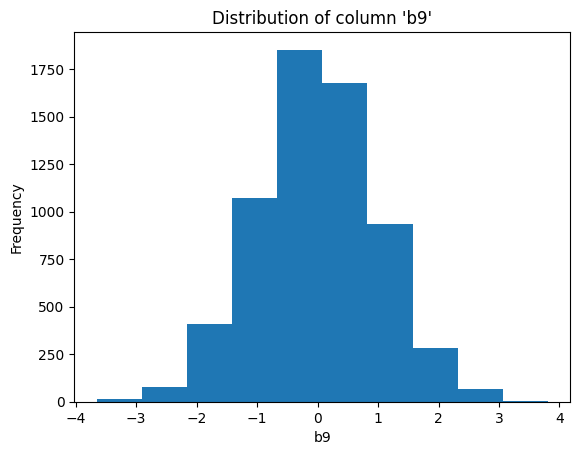

Statistics for column: b9
Mean: 0.0033487151899842206
Median: -0.00846249551363095
Standard Deviation: 0.9979136214832021
Minimum Value: -3.64906264242973
Maximum Value: 3.80816944730712

After standardization:


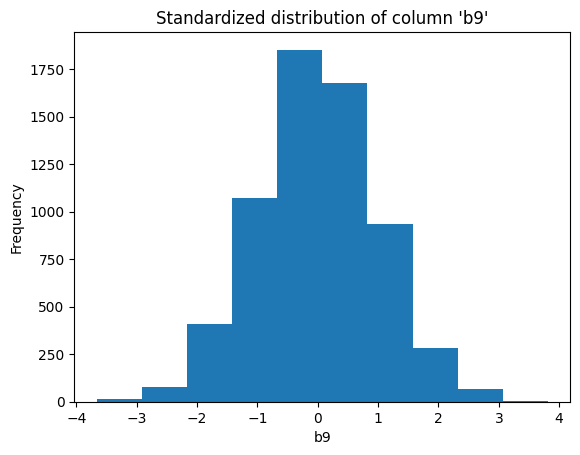

Statistics for column: b9
Mean: -1.1102230246251566e-17
Median: -0.011835904762679844
Standard Deviation: 0.9999999899790927
Minimum Value: -3.6600475656306286
Maximum Value: 3.812775587063601

Before standardization:


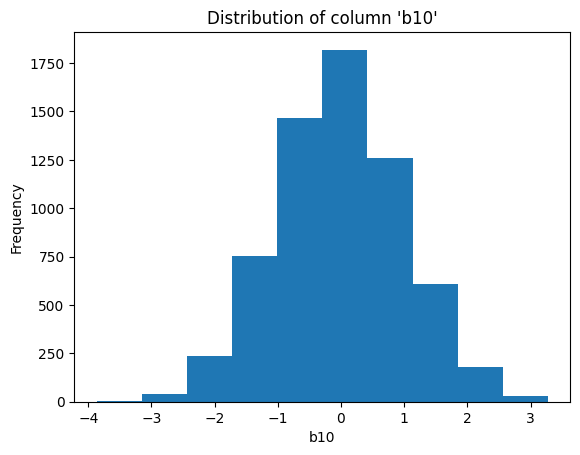

Statistics for column: b10
Mean: -0.014593619555078074
Median: -0.02370334622029725
Standard Deviation: 1.0032017518902436
Minimum Value: -3.86240698430107
Maximum Value: 3.27383545136609

After standardization:


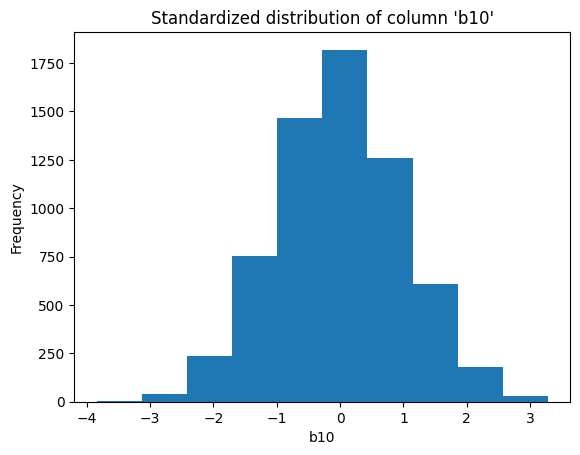

Statistics for column: b10
Mean: -2.1094237467877975e-17
Median: -0.00908065257785685
Standard Deviation: 0.9999999900319154
Minimum Value: -3.835532901672641
Maximum Value: 3.27793390705881



In [15]:
for fold in range(NUM_FOLDS):
    training_data = kfold_data[fold]["train"]
    for column in numeric_columns:
        mean = training_data[column].mean()
        std = training_data[column].std()
        print("Before standardization:")
        plot_distribution(training_data[column], column, f"Distribution of column '{column}'")
        print_statistics(training_data[column], column)
        
        print("After standardization:")
        training_data[column] = (training_data[column] - mean) / (std + 1e-8)
        plot_distribution(training_data[column], column, f"Standardized distribution of column '{column}'")
        print_statistics(training_data[column], column)
    
    break # Temporary break to only show the first fold